In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('D:\deeplizardData\Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

PreProcessing data

In [3]:
train_path = 'deeplizardData/Sign-Language-Digits-Dataset/train'
valid_path = 'deeplizardData/Sign-Language-Digits-Dataset/valid'
test_path = 'deeplizardData/Sign-Language-Digits-Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


Modify the model

In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [5]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [8]:
x= mobile.layers[-5].output
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output= Dense(units=10,activation = 'softmax')(x)

In [9]:
model= Model(inputs=mobile.input, outputs= output)

By default all layers are trainable, for this task we will make only the **last 23 layers to be trainable, rest of them => not trainable=> freezing them**

In [10]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

Now train

In [15]:
model.compile(loss= 'categorical_crossentropy', optimizer= Adam(learning_rate=0.0001), metrics= ['accuracy'])

In [16]:
model.fit(x=train_batches,validation_data= valid_batches, epochs=30, verbose=2)

Epoch 1/30



172/172 - 31s - loss: 0.6125 - accuracy: 0.8207 - val_loss: 0.2865 - val_accuracy: 0.9267 - 31s/epoch - 181ms/step
Epoch 2/30
172/172 - 27s - loss: 0.1066 - accuracy: 0.9836 - val_loss: 0.1133 - val_accuracy: 0.9767 - 27s/epoch - 157ms/step
Epoch 3/30
172/172 - 27s - loss: 0.0585 - accuracy: 0.9942 - val_loss: 0.0734 - val_accuracy: 0.9800 - 27s/epoch - 157ms/step
Epoch 4/30
172/172 - 26s - loss: 0.0361 - accuracy: 0.9971 - val_loss: 0.0810 - val_accuracy: 0.9733 - 26s/epoch - 150ms/step
Epoch 5/30
172/172 - 24s - loss: 0.0281 - accuracy: 0.9959 - val_loss: 0.0495 - val_accuracy: 0.9867 - 24s/epoch - 142ms/step
Epoch 6/30
172/172 - 24s - loss: 0.0167 - accuracy: 0.9982 - val_loss: 0.0483 - val_accuracy: 0.9833 - 24s/epoch - 140ms/step
Epoch 7/30
172/172 - 25s - loss: 0.0159 - accuracy: 0.9988 - val_loss: 0.0689 - val_accuracy: 0.9767 - 25s/epoch - 144ms/step
Epoch 8/30
172/172 - 24s - loss: 0.0158 - accuracy: 0.9982 - val_loss: 0.0499 - val_accuracy: 0.9867 - 24s/epoch - 140ms/step
Epo

In [18]:
test_labels= test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [19]:
test_batches

In [20]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [21]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [22]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [23]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


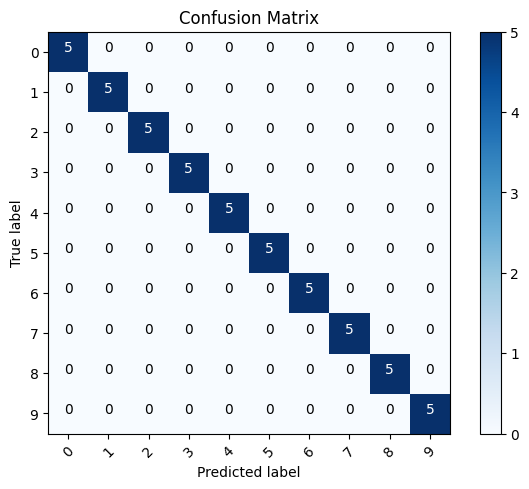

In [25]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')